Name:				 	  Agbo James Daniel
Matric Number: 	ACE24210007
Department: 		MSc. Artificial Intelligence
Course: 				ATI803


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Q1. Using the london_weather.csv and the london_energy.csv datasets on the Moodle
page, answer the following questions by drafting a report:
a. Load the london_weather.csv into a dataframe and clean up the data into a useable
format. Based on the entries in date column, use the .groupby() to group the date into
these categorization on a Year_Month form (e.g 1979_Jan, 1979_Feb,
1079_Mar…groups), then:
i. Find the highest temperature for each of the grouping based on max_temp. Do the
same computation for mean_temp and min_temp separately. [5marks]

Solution

In [2]:
#Import library
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [209]:
#Load London weather Dataset from google drive
ldn_weather_df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/london_weather.csv", parse_dates=['date'])

Data Preprocessing

In [210]:
ldn_weather_df.head(5)

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [212]:
#Check dataset information
ldn_weather_df.info()
ldn_weather_df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       15322 non-null  float64       
 2   sunshine          15341 non-null  float64       
 3   global_radiation  15322 non-null  float64       
 4   max_temp          15335 non-null  float64       
 5   mean_temp         15305 non-null  float64       
 6   min_temp          15339 non-null  float64       
 7   precipitation     15335 non-null  float64       
 8   pressure          15337 non-null  float64       
 9   snow_depth        13900 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.2 MB


(15341, 10)

In [213]:
'''
From the information above we have 10 columns and 15,341 rows, only date and sunshine has complete values, the rest are having missing values
Identify and handle missing values by filling them with the most reoccurring
value for that column
'''

'\nFrom the information above we have 10 columns and 15,341 rows, only date and sunshine has complete values, the rest are having missing values\nIdentify and handle missing values by filling them with the most reoccurring\nvalue for that column\n'

In [215]:
#using mode to fill the missing values
ldn_weather_df.fillna(ldn_weather_df.mode().iloc[0], inplace=True)


In [216]:
ldn_weather_df.isnull().sum()

,0
date,0
cloud_cover,0
sunshine,0
global_radiation,0
max_temp,0
mean_temp,0
min_temp,0
precipitation,0
pressure,0
snow_depth,0


In [218]:
ldn_weather_df['Year_Month'] = ldn_weather_df['date'].dt.to_period('M').astype(str) #Date formating

In [219]:
ldn_weather_df.head(5)

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,Year_Month
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979-01
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979-01
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979-01
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979-01
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979-01


In [220]:
#Q1.i group by date
grouped_by = ldn_weather_df.groupby('Year_Month').agg({
    'max_temp': 'max',
    'mean_temp': 'mean',
    'min_temp': 'min'
}).reset_index()

In [221]:
grouped_by.head(5)

,Year_Month,max_temp,mean_temp,min_temp
0,1979-01,9.1,0.616129,-7.5
1,1979-02,9.7,2.042857,-4.1
2,1979-03,15.3,5.587097,-3.0
3,1979-04,22.4,8.743333,-1.7
4,1979-05,26.2,11.490323,-0.9


Visualization for Insight

         max_temp   mean_temp    min_temp
count  504.000000  504.000000  504.000000
mean    21.506151   11.441148    1.834524
std      6.788016    5.084149    5.220730
min      4.100000   -0.467857  -11.800000
25%     15.100000    7.059973   -2.325000
50%     21.200000   11.056452    0.900000
75%     27.200000   15.989167    6.600000
max     37.900000   22.438710   13.700000
    Year_Month  max_temp  mean_temp  min_temp
498    2020-07      37.9  18.348387       8.7
295    2003-08      37.9  21.058065       8.4
486    2019-07      37.9  20.180645      10.8
437    2015-06      36.7  16.843333       7.1
139    1990-08      36.5  20.329032      10.4
499    2020-08      36.5  20.083871       8.1
330    2006-07      35.5  22.438710      12.3
474    2018-07      35.0  22.309677      13.7
461    2017-06      34.5  18.953333       9.4
198    1995-07      34.3  20.754839      11.2
    Year_Month  max_temp  mean_temp  min_temp
330    2006-07      35.5  22.438710      12.3
474    2018-07      35.0

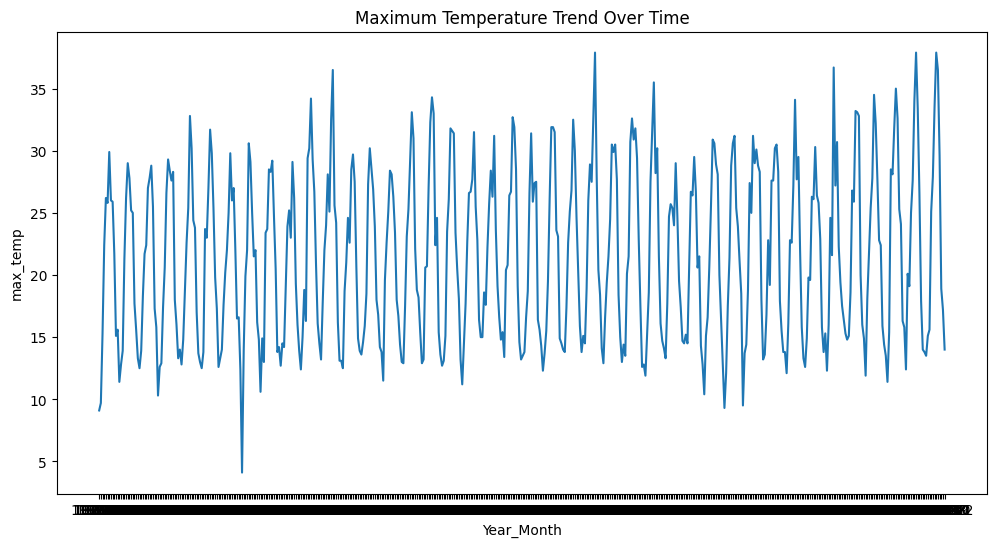

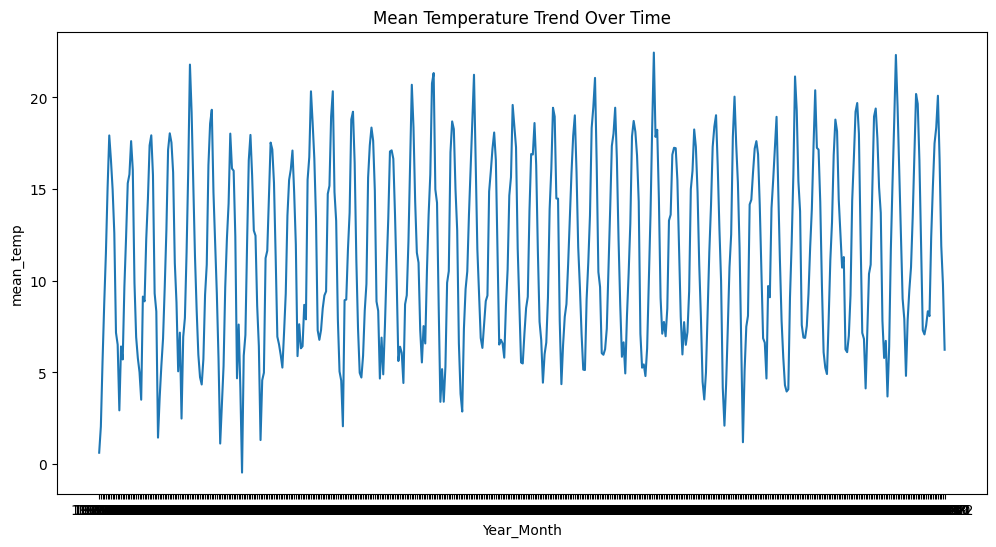

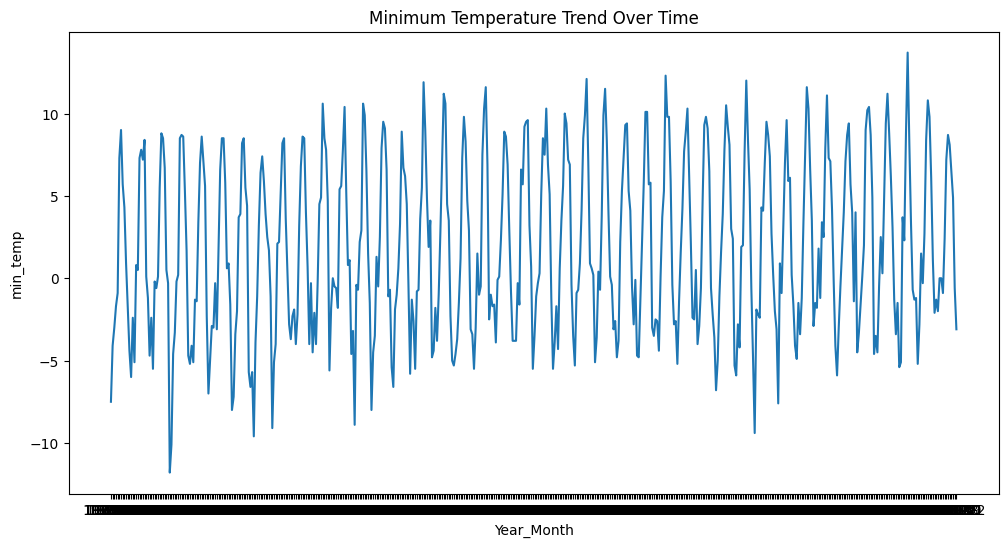

In [27]:
#Analyze the grouped data to find insights

print(grouped_by.describe())  # Get descriptive statistics for each column
print(grouped_by.sort_values('max_temp', ascending=False).head(10))  #top 10 months with the highest max temperature
print(grouped_by.sort_values('mean_temp', ascending=False).head(10))  #top 10 months with the highest mean temperature
print(grouped_by.sort_values('min_temp', ascending=False).head(10))  #top 10 months with the highest min temperature

#data plot to visualize the trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year_Month', y='max_temp', data=grouped_by)
plt.title('Maximum Temperature Trend Over Time')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year_Month', y='mean_temp', data=grouped_by)
plt.title('Mean Temperature Trend Over Time')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year_Month', y='min_temp', data=grouped_by)
plt.title('Minimum Temperature Trend Over Time')
plt.show()


In [222]:
print(grouped_by.sort_values('max_temp', ascending=False).head(10))

    Year_Month  max_temp  mean_temp  min_temp
498    2020-07      37.9  18.348387       8.7
295    2003-08      37.9  21.058065       8.4
486    2019-07      37.9  20.180645      10.8
437    2015-06      36.7  16.843333       7.1
139    1990-08      36.5  20.329032      10.4
499    2020-08      36.5  20.083871       8.1
330    2006-07      35.5  22.438710      12.3
474    2018-07      35.0  22.309677      13.7
461    2017-06      34.5  18.953333       9.4
198    1995-07      34.3  20.754839      11.2


In [224]:
print(grouped_by.sort_values('min_temp').head(10))

    Year_Month  max_temp  mean_temp  min_temp
35     1981-12      10.3   1.438710     -11.8
36     1982-01      12.6   3.638710     -10.1
85     1986-02       4.1  -0.467857      -9.6
383    2010-12       9.5   1.187097      -9.4
96     1987-01      10.6   1.306452      -9.1
145    1991-02      12.5   2.057143      -8.9
72     1985-01      13.3   1.116129      -8.0
155    1991-12      13.9   4.970968      -8.0
397    2012-02      16.8   4.662069      -7.6
0      1979-01       9.1   0.616129      -7.5


In [225]:
print(grouped_by.sort_values('mean_temp', ascending=False).head(10))

    Year_Month  max_temp  mean_temp  min_temp
330    2006-07      35.5  22.438710      12.3
474    2018-07      35.0  22.309677      13.7
54     1983-07      32.8  21.783871       8.6
199    1995-08      33.0  21.322581      10.6
223    1997-08      31.5  21.229032      11.6
414    2013-07      34.1  21.135484      11.6
295    2003-08      37.9  21.058065       8.4
198    1995-07      34.3  20.754839      11.2
186    1994-07      33.1  20.683871      11.9
426    2014-07      30.3  20.383871      11.1


    Year_Month  max_temp  mean_temp  min_temp  temp_variation  year
437    2015-06      36.7  16.843333       7.1            29.6  2015
295    2003-08      37.9  21.058065       8.4            29.5  2003
498    2020-07      37.9  18.348387       8.7            29.2  2020
499    2020-08      36.5  20.083871       8.1            28.4  2020
316    2005-05      30.7  13.106452       2.5            28.2  2005
220    1997-05      26.6  13.593548      -0.5            27.1  1997
4      1979-05      26.2  11.490323      -0.9            27.1  1979
486    2019-07      37.9  20.180645      10.8            27.1  2019
317    2005-06      32.6  17.866667       5.8            26.8  2005
376    2010-05      28.8  12.516129       2.0            26.8  2010
year
1979     9.938562
1980    10.366561
1981    10.281527
1982    10.973592
1983    11.174101
1984    10.922578
1985    10.051369
1986     9.927338
1987    10.260558
1988    10.848971
1989    12.050666
1990    12.051811
1991    10.651518
1992    11.21

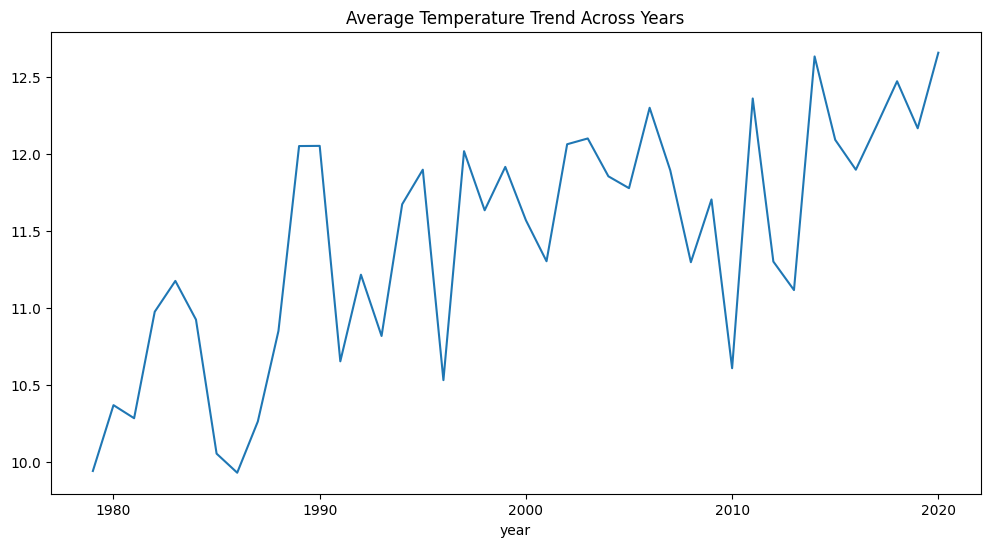

In [227]:

#calculate the difference between the maximum and minimum temperatures for each month and identify periods with large variations.
grouped_by['temp_variation'] = grouped_by['max_temp'] - grouped_by['min_temp']
print(grouped_by.sort_values('temp_variation', ascending=False).head(10))  # Find the top 10 months with the highest temperature variation


# Comparing the average temperature across different years, I group the data by year and calculate the average temperature for each year.
grouped_by['year'] = grouped_by['Year_Month'].str[:4].astype(int)
yearly_avg_temp = grouped_by.groupby('year')['mean_temp'].mean()
print(yearly_avg_temp)


plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_avg_temp.index, y=yearly_avg_temp.values)
plt.title('Average Temperature Trend Across Years')
plt.show()



**Question 1B**

Load the london_energy.csv into a dataframe and clean up the data into a useable
format. Then join this dataset with the london_weather.csv datasets on the date
column. Identify and handle missing values by filling them with the most reoccurring
value for that column. After some preprocessing, and perform the following data
analytics tasks and compile your observations/results into a report:

i. What are the top 10 homes which had most energy consumption measurement in kWh
for the month of December 2011? Do the same separately for December 2012 and
December 2013. [5marks]

In [228]:
#Load energy data
ldn_energy_df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/london_energy.csv")

In [229]:
ldn_energy_df.head(5)

,LCLid,Date,KWH
0,MAC000002,2012-10-12,7.098
1,MAC000002,2012-10-13,11.087
2,MAC000002,2012-10-14,13.223
3,MAC000002,2012-10-15,10.257
4,MAC000002,2012-10-16,9.769


In [230]:
ldn_energy_df.info() #Data overview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731338 entries, 0 to 731337
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   LCLid   731338 non-null  object 
 1   Date    731338 non-null  object 
 2   KWH     731336 non-null  float64
dtypes: float64(1), object(2)
memory usage: 16.7+ MB


In [231]:
ldn_energy_df.isnull().sum() #to check for missing values

,0
LCLid,0
Date,0
KWH,2


In [232]:
#only KWH has a missing value of two elements, we will use mode to fill the missing data, the Date datatype is wrong, object instead of datetime datatype, so we convert it
ldn_energy_df.fillna(ldn_energy_df.mode().iloc[0], inplace=True) #To fill the missing value

In [233]:
ldn_energy_df.isnull().sum()

,0
LCLid,0
Date,0
KWH,0


In [235]:
ldn_energy_df['Date'].unique()

array(['2012-10-12', '2012-10-13', '2012-10-14', '2012-10-15',
       '2012-10-16', '2012-10-17', '2012-10-18', '2012-10-19',
       '2012-10-20', '2012-10-21', '2012-10-22', '2012-10-23',
       '2012-10-24', '2012-10-25', '2012-10-26', '2012-10-27',
       '2012-10-28', '2012-10-29', '2012-10-30', '2012-10-31',
       '2012-11-01', '2012-11-02', '2012-11-03', '2012-11-04',
       '2012-11-05', '2012-11-06', '2012-11-07', '2012-11-08',
       '2012-11-09', '2012-11-10', '2012-11-11', '2012-11-12',
       '2012-11-13', '2012-11-14', '2012-11-15', '2012-11-16',
       '2012-11-17', '2012-11-18', '2012-11-19', '2012-11-20',
       '2012-11-21', '2012-11-22', '2012-11-23', '2012-11-24',
       '2012-11-25', '2012-11-26', '2012-11-27', '2012-11-28',
       '2012-11-29', '2012-11-30', '2012-12-01', '2012-12-02',
       '2012-12-03', '2012-12-04', '2012-12-05', '2012-12-06',
       '2012-12-07', '2012-12-08', '2012-12-09', '2012-12-10',
       '2012-12-11', '2012-12-12', '2012-12-13', '2012-

In [237]:
ldn_energy_df['Date'].value_counts()

,count
Date,
2012-12-18,1047
2012-11-14,1046
2012-11-20,1046
2012-11-21,1046
2012-11-19,1046
...,...
2011-11-24,25
2011-11-23,13
7.91,1


In [238]:
#The Date Column in energy data contains some invalid 201 and 7.91 are not valid

ldn_energy_df.dropna(subset=['Date'], inplace=True) # Remove rows with invalid dates

Merge Weather and Energy Data

In [239]:
'''the date spelling in ldnldn_weather_df is not thesame spelling with Date in ldn_ldn_energy_df, we need to replace Date
in ldn_energy_df with date and the datatype are different, it is datetime in ldn_weather_df and object in ldn_energy_df,
so i converted the later to datetime'''

ldn_energy_df.columns = ldn_energy_df.columns.str.lower()

In [240]:

# Convert 'date' column to datetime objects, handling errors
ldn_energy_df['date'] = pd.to_datetime(ldn_energy_df['date'], errors='coerce')



In [241]:
ldn_energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731338 entries, 0 to 731337
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   lclid   731338 non-null  object        
 1   date    731335 non-null  datetime64[ns]
 2   kwh     731338 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 16.7+ MB


In [242]:
#To merge energy and weather file with key 'date'
ldn_weather_energy_df = pd.merge(ldn_weather_df, ldn_energy_df, on='date', how='inner')

In [243]:
ldn_weather_energy_df.head(5)

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,Year_Month,lclid,kwh
0,2011-11-23,7.0,2.0,35.0,13.5,6.8,2.6,0.2,102720.0,0.0,2011-11,MAC000145,8.952
1,2011-11-23,7.0,2.0,35.0,13.5,6.8,2.6,0.2,102720.0,0.0,2011-11,MAC000146,5.619
2,2011-11-23,7.0,2.0,35.0,13.5,6.8,2.6,0.2,102720.0,0.0,2011-11,MAC000147,3.036
3,2011-11-23,7.0,2.0,35.0,13.5,6.8,2.6,0.2,102720.0,0.0,2011-11,MAC000148,1.283
4,2011-11-23,7.0,2.0,35.0,13.5,6.8,2.6,0.2,102720.0,0.0,2011-11,MAC000149,2.287


In [244]:
ldn_weather_energy_df.isnull().sum()

,0
date,0
cloud_cover,0
sunshine,0
global_radiation,0
max_temp,0
mean_temp,0
min_temp,0
precipitation,0
pressure,0
snow_depth,0


Question 1b.i solution

In [245]:
#for dec. 2011
dec_2011 = ldn_weather_energy_df[(ldn_weather_energy_df['date'].dt.year == 2011) & (ldn_weather_energy_df['date'].dt.month == 12)]
top_10_2011 = dec_2011.groupby('lclid')['kwh'].sum().nlargest(10).reset_index()

In [246]:
top_10_2011 #Top 10 in 2011

,lclid,kwh
0,MAC000153,1176.076
1,MAC000274,1077.940
2,MAC000105,1063.377
3,MAC000252,1027.412
4,MAC000216,998.511
5,MAC000049,989.307
6,MAC000237,962.487
7,MAC000257,930.581
8,MAC000235,914.164
9,MAC000222,891.227


In [248]:
dec_2012 = ldn_weather_energy_df[(ldn_weather_energy_df['date'].dt.year == 2012) & (ldn_weather_energy_df['date'].dt.month == 12)]
top_10_2012 = dec_2012.groupby('lclid')['kwh'].sum().nlargest(10).reset_index()
top_10_2012 #Top 10 in 2012

,lclid,kwh
0,MAC000693,3887.944
1,MAC000358,2866.321
2,MAC000697,2626.600
3,MAC000450,2503.912
4,MAC000321,2486.007
5,MAC000105,2473.542
6,MAC000557,2343.794
7,MAC000569,2160.625
8,MAC000249,1944.432
9,MAC000307,1821.103


In [249]:
dec_2013 = ldn_weather_energy_df[(ldn_weather_energy_df['date'].dt.year == 2013) & (ldn_weather_energy_df['date'].dt.month == 12)]
top_10_2013 = dec_2013.groupby('lclid')['kwh'].sum().nlargest(10).reset_index()
top_10_2013 #to 10 in 2013

,lclid,kwh
0,MAC000693,3315.378
1,MAC000654,2436.238
2,MAC000697,2265.750
3,MAC000569,2213.017
4,MAC000557,2165.186
5,MAC000664,1908.822
6,MAC000715,1657.036
7,MAC000661,1549.580
8,MAC000274,1503.113
9,MAC000245,1460.633


                                date    cloud_cover       sunshine  \
count                         731335  731335.000000  731335.000000   
mean   2013-02-23 08:25:23.495524352       4.732949       3.962808   
min              2011-11-23 00:00:00       0.000000       0.000000   
25%              2012-08-30 00:00:00       3.000000       0.400000   
50%              2013-02-22 00:00:00       5.000000       3.100000   
75%              2013-08-22 00:00:00       7.000000       6.400000   
max              2014-02-28 00:00:00       8.000000      14.500000   
std                              NaN       2.334230       3.874714   

       global_radiation       max_temp      mean_temp       min_temp  \
count     731335.000000  731335.000000  731335.000000  731335.000000   
mean         111.782116      15.074179      11.308507       7.492293   
min           12.000000      -0.200000      -2.600000      -7.600000   
25%           38.000000      10.200000       6.900000       3.300000   
50%      

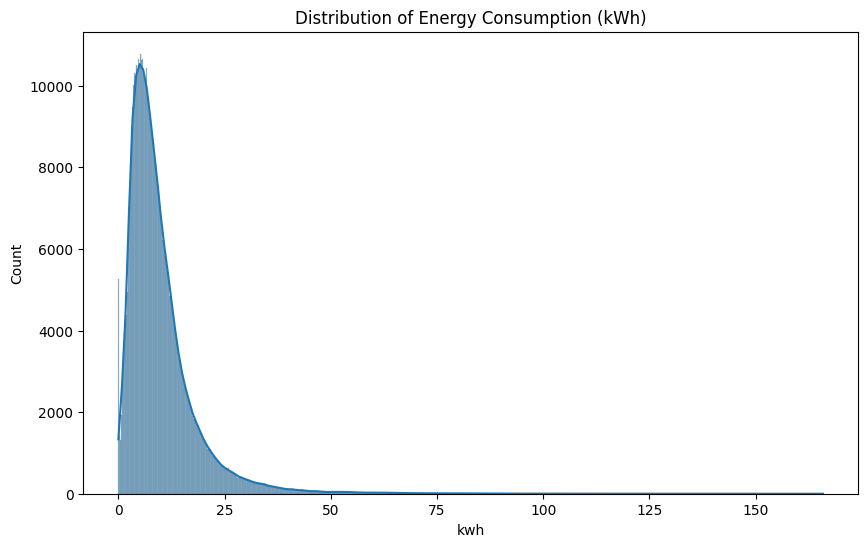

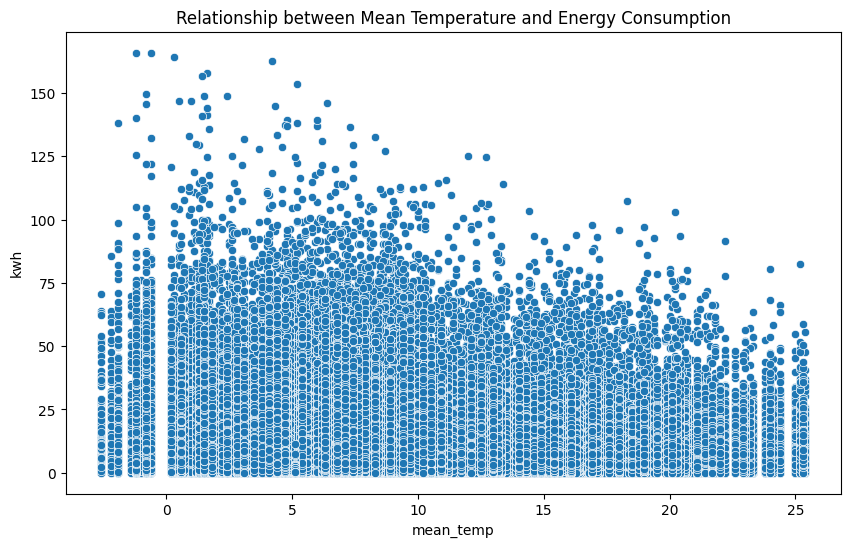

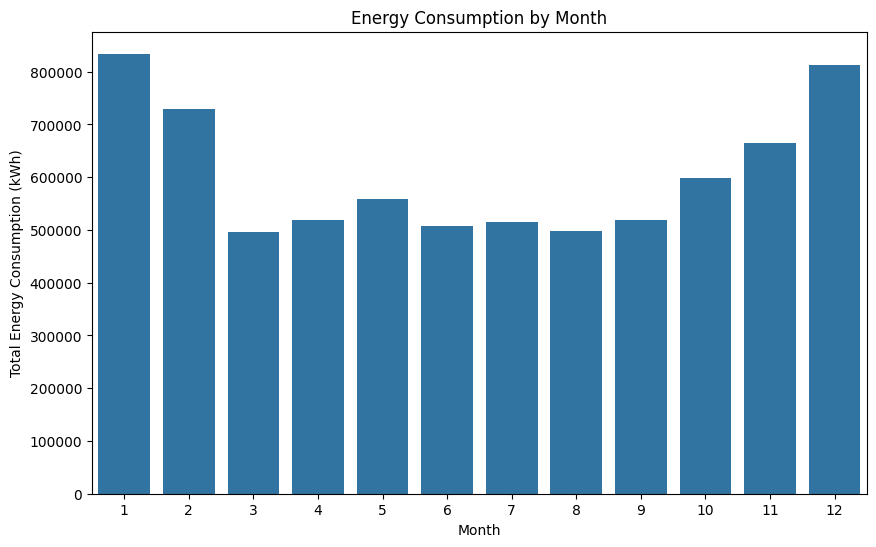

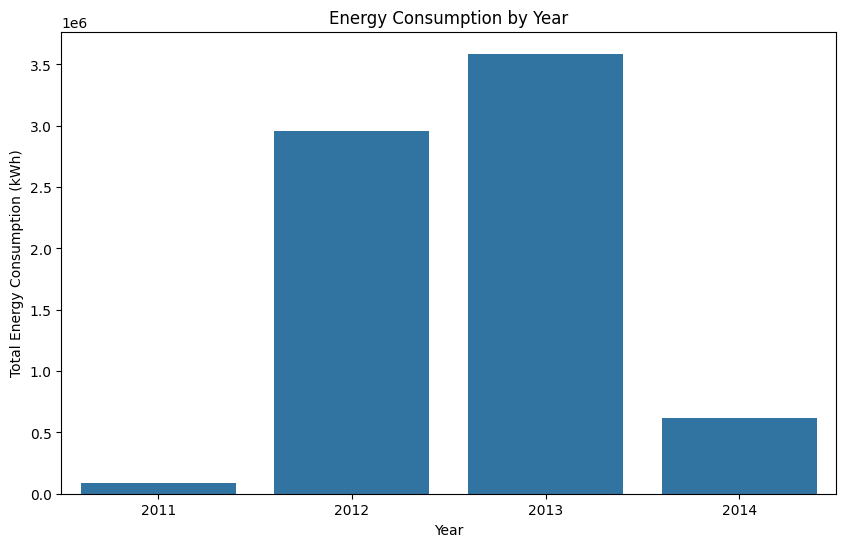

lclid
MAC000693    47101.440
MAC000557    44694.933
MAC000697    44035.588
MAC000105    40441.950
MAC000450    30370.345
MAC000049    30104.075
MAC000307    29530.006
MAC000274    28724.719
MAC000715    28225.264
MAC000321    27745.852
Name: kwh, dtype: float64


In [250]:


# Generate descriptive statistics for the dataframe
print(ldn_weather_energy_df.describe())


# Analyze the distribution of energy consumption (kWh)
plt.figure(figsize=(10, 6))
sns.histplot(ldn_weather_energy_df['kwh'], kde=True)
plt.title('Distribution of Energy Consumption (kWh)')
plt.show()

# Explore the relationship between temperature and energy consumption
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mean_temp', y='kwh', data=ldn_weather_energy_df)
plt.title('Relationship between Mean Temperature and Energy Consumption')
plt.show()

# Investigate the energy consumption patterns across different months
monthly_consumption = ldn_weather_energy_df.groupby(ldn_weather_energy_df['date'].dt.month)['kwh'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_consumption.index, y=monthly_consumption.values)
plt.title('Energy Consumption by Month')
plt.xlabel('Month')
plt.ylabel('Total Energy Consumption (kWh)')
plt.show()

# Analyze the energy consumption patterns across different years
yearly_consumption = ldn_weather_energy_df.groupby(ldn_weather_energy_df['date'].dt.year)['kwh'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_consumption.index, y=yearly_consumption.values)
plt.title('Energy Consumption by Year')
plt.xlabel('Year')
plt.ylabel('Total Energy Consumption (kWh)')
plt.show()

# Investigate the energy consumption patterns across different homes (LCLid)
home_consumption = ldn_weather_energy_df.groupby('lclid')['kwh'].sum().sort_values(ascending=False)
print(home_consumption.head(10))




END OF NO. 1........................................................... END................................................................END

QUESTION 2 SOLUTION START HERE

"""
Q2. Using the gp-prescribing-july-20242.csv dataset on the Moodle page, explore the
GP prescription dataset for the month of July 2024, and harnessing various Matplotlib and
Plotly visualizations to uncover important insights which should be drafted into your report:
    i. Calculate and visualise in a bar chart the top 10 prescriptions made within the month of
    July 2024. Secondly, create another bar chart to calculate and visualize the 10 least
    prescriptions made within the month of July 2024. Thirdly, create another bar chart to
    calculate and visualize the 10 average prescriptions made within the month of July
    2024. Use a Matplotlib fig, ax = plt.subplots()to layout these bar charts in a
    single row three columns arrangement. [5marks]
    ii. Using a line plot on a single chart, visualize the Gross Cost (£) trend for each GP
    (Practice) for the month of July 2024. Limit your selection to only the top 15 GP
    based on summation of Gross Cost (£). Each GP categorization should be delineated
    by a distinct line with evident markers. Incorporate hover functionality to present the
    exact Gross Cost (£) figures for each prescription. [5marks]
    iii. Using a bar plot, compare the summation of Actual Cost (£) for prescriptions made
    by top 15 GP (Practice) within July 2024. Assign a distinct hue to each day to
    delineate daily variations. Incorporate hover details to display the exact sales numbers.
    [5marks]
    iv. Set against each other Total Items and Total Quantity for each prescription across
    the distinct GPs represented for the month of July 2024 to create a scatter plot for each
    GP (Practice). Randomly select only 20 GP. And use a Matplotlib fig, ax =
    plt.subplots()to arrange all scatter plots into rows and columns. [5marks]

Compile these graphs into your report and provide detailed discussion on the patterns
represented in the graphs. Ascertain that every graph has fitting x and y-axis denominations.
Afford each visualization an elucidative title. Ensure every graph plotted has legend added to
it. Refine the color scheme to both captivate and ensure uniformity across all presentations.
"""

In [25]:
#Load the dataset
gp_prescribe_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gp-prescribing-july-20242.csv', low_memory=False)

Data Preprocessing

In [26]:
gp_prescribe_df.head(5)

,Practice,Year,Month,VTM_NM,VMP_NM,AMP_NM,Presentation,Strength,Total Items,Total Quantity,Gross Cost (£),Actual Cost (£),BNF Code,BNF Chapter,BNF Section,BNF Paragraph,BNF Sub-Paragraph
0,1,2024,7,-,Absorbent cellulose dressing with fluid repell...,Mesorb dressing 10cm x 10cm,-,-,2,20,13.4,11.970,20030100105,20,3,1,0
1,1,2024,7,-,Absorbent cellulose dressing with fluid repell...,Mesorb dressing 10cm x 15cm,-,-,1,20,17.6,15.720,20030100106,20,3,1,0
2,1,2024,7,-,Absorbent cellulose dressing with fluid repell...,Mesorb dressing 20cm x 30cm,-,-,1,40,110.4,110.400,20030100110,20,3,1,0
3,1,2024,7,-,Absorbent perforated dressing with adhesive bo...,PremierPore dressing 10cm x 10cm,-,-,2,60,7.2,6.485,20030100526,20,3,1,0
4,1,2024,7,-,Absorbent perforated dressing with adhesive bo...,PremierPore dressing 10cm x 15cm,-,-,1,50,9.0,8.051,20030100527,20,3,1,0


In [7]:
#To review the dataset summary
gp_prescribe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448379 entries, 0 to 448378
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Practice           448379 non-null  int64  
 1   Year               448379 non-null  int64  
 2   Month              448379 non-null  int64  
 3   VTM_NM             448379 non-null  object 
 4   VMP_NM             448379 non-null  object 
 5   AMP_NM             448379 non-null  object 
 6   Presentation       448379 non-null  object 
 7   Strength           425709 non-null  object 
 8   Total Items        448379 non-null  int64  
 9   Total Quantity     448379 non-null  int64  
 10  Gross Cost (£)     448379 non-null  float64
 11  Actual Cost (£)    448379 non-null  float64
 12  BNF Code           448379 non-null  object 
 13  BNF Chapter        448379 non-null  object 
 14  BNF Section        448379 non-null  object 
 15  BNF Paragraph      448379 non-null  object 
 16  BN

In [8]:
#To check missing values
gp_prescribe_df.isnull().sum()

,0
Practice,0
Year,0
Month,0
VTM_NM,0
VMP_NM,0
AMP_NM,0
Presentation,0
Strength,22670
Total Items,0
Total Quantity,0


In [27]:
#From the above strength column is having 22,670 missing values
#We need to further review the data
#Further examination review that about four columns namely 'Presentation, Strength, AMP_NM	 and VTM_NM' has '-' as input, we need to handle that
gp_prescribe_df.head(20)

,Practice,Year,Month,VTM_NM,VMP_NM,AMP_NM,Presentation,Strength,Total Items,Total Quantity,Gross Cost (£),Actual Cost (£),BNF Code,BNF Chapter,BNF Section,BNF Paragraph,BNF Sub-Paragraph
0,1,2024,7,-,Absorbent cellulose dressing with fluid repell...,Mesorb dressing 10cm x 10cm,-,-,2,20,13.40,11.970,20030100105,20,3,1,0
1,1,2024,7,-,Absorbent cellulose dressing with fluid repell...,Mesorb dressing 10cm x 15cm,-,-,1,20,17.60,15.720,20030100106,20,3,1,0
2,1,2024,7,-,Absorbent cellulose dressing with fluid repell...,Mesorb dressing 20cm x 30cm,-,-,1,40,110.40,110.400,20030100110,20,3,1,0
3,1,2024,7,-,Absorbent perforated dressing with adhesive bo...,PremierPore dressing 10cm x 10cm,-,-,2,60,7.20,6.485,20030100526,20,3,1,0
4,1,2024,7,-,Absorbent perforated dressing with adhesive bo...,PremierPore dressing 10cm x 15cm,-,-,1,50,9.00,8.051,20030100527,20,3,1,0
5,1,2024,7,-,Absorbent perforated dressing with adhesive bo...,PremierPore dressing 5cm x 7cm,-,-,3,110,5.50,4.936,20030100525,20,3,1,0
6,1,2024,7,-,Activated charcoal absorbent dressing 10cm x 10cm,CarboFlex dressing 10cm x 10cm,-,-,1,20,70.20,62.706,20031000015,20,3,10,0
7,1,2024,7,-,Adhesive dressing remover sterile spray,Appeel Sterile medical adhesive remover spray,-,-,1,100,17.36,15.761,21360000103,21,36,0,0
8,1,2024,7,-,Anal irrigation systems,Peristeen Plus anal irrigation system accessor...,-,-,1,2,284.40,255.718,21280000172,21,28,0,0
9,1,2024,7,-,Artificial saliva gel,Biotene Oralbalance dry mouth saliva replaceme...,-,-,1,50,5.30,4.733,21210000005,21,21,0,0


From the dataframe above we can see that some columns has some invalid data,
some of those columns are 'Presentation, AMP_NM, Strength and VTM_NM' the invalid data is '-'.

In [28]:
#lets check there value counts since those columns are objects dtype from the info above
gp_prescribe_df['Presentation'].value_counts().reset_index()


,Presentation,count
0,Tablet,101595
1,-,96070
2,Modified-release tablet,24610
3,Capsule,24086
4,Eye drops,16377
...,...,...
80,Powder for gastroenteral liquid,9
81,Muco-adhesive buccal tablet,6
82,Powder for nebuliser solution,5
83,Powder and suspension for suspension for injec...,1


In [29]:
gp_prescribe_df['VTM_NM'].value_counts().reset_index()

,VTM_NM,count
0,-,77952
1,Estradiol,5474
2,Colecalciferol,3883
3,Colecalciferol + Calcium carbonate,3803
4,Venlafaxine,3256
...,...,...
1016,Voriconazole,1
1017,Zidovudine + Lamivudine,1
1018,Nafarelin,1
1019,Dextromethorphan,1


In [259]:
gp_prescribe_df['Strength'].value_counts()


,count
Strength,
-,76934
10mg,19971
5mg,15177
50mg,13188
100mg,13045
...,...
50mg/10ml(0.5%),1
750microlitres/5ml,1
322mg/350microgram,1


In [264]:
gp_prescribe_df['AMP_NM'].value_counts().reset_index()

,AMP_NM,count
0,Sharpsafe disposal unit,246741
1,NovoPen 6 hypodermic insulin injection pen reu...,330
2,Symbicort 200/6 Turbohaler,311
3,FreeStyle Libre 2 Sensor,311
4,Evorel Conti patches,311
...,...,...
7361,Vanilla Blush Level 2/3 unisex support vest XX...,1
7362,Renasys Go canister kit small,1
7363,ClearFilm dressing 10cm x 12cm,1
7364,UrgoStart plus Absorb dressing 6cm x 6cm square,1


In [30]:

# Replace '-' with NaN in 'Presentation', 'Strength', 'VTM_NM' and  AMP_NM columns
gp_prescribe_df['Presentation'] = gp_prescribe_df['Presentation'].replace('-', np.nan)
gp_prescribe_df['Strength'] = gp_prescribe_df['Strength'].replace('-', np.nan)
gp_prescribe_df['VTM_NM'] = gp_prescribe_df['VTM_NM'].replace('-', np.nan)
gp_prescribe_df['AMP_NM'] = gp_prescribe_df['AMP_NM'].replace('-', np.nan)

# fill them with the most frequent value (mode) for each column since they are object:

for column in ['Presentation', 'Strength', 'VTM_NM', 'AMP_NM']:
    gp_prescribe_df[column].fillna(gp_prescribe_df[column].mode()[0], inplace=True)



<ipython-input-30-da95edd9d6dc>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gp_prescribe_df[column].fillna(gp_prescribe_df[column].mode()[0], inplace=True)


In [31]:
gp_prescribe_df['Presentation'].value_counts().reset_index()

,Presentation,count
0,Tablet,197665
1,Modified-release tablet,24610
2,Capsule,24086
3,Eye drops,16377
4,Cream,15810
...,...,...
79,Powder for gastroenteral liquid,9
80,Muco-adhesive buccal tablet,6
81,Powder for nebuliser solution,5
82,Powder and suspension for suspension for injec...,1


In [321]:
gp_prescribe_df['Strength'].value_counts().reset_index()

,Strength,count
0,10mg,119575
1,5mg,15177
2,50mg,13188
3,100mg,13045
4,20mg,11704
...,...,...
921,250microgram/0.5ml,1
922,2g/10ml,1
923,200mg/20ml,1
924,20000unit/2ml,1


In [322]:
gp_prescribe_df['VTM_NM'].value_counts().reset_index()

,VTM_NM,count
0,Estradiol,83426
1,Colecalciferol,3883
2,Colecalciferol + Calcium carbonate,3803
3,Venlafaxine,3256
4,Quetiapine,3140
...,...,...
1015,Bupivacaine,1
1016,Allantoin + Lidocaine,1
1017,Linseed oil,1
1018,Cytisinicline,1


In [32]:
gp_prescribe_df['AMP_NM'].value_counts().reset_index()

,AMP_NM,count
0,Sharpsafe disposal unit,246741
1,NovoPen 6 hypodermic insulin injection pen reu...,330
2,Symbicort 200/6 Turbohaler,311
3,FreeStyle Libre 2 Sensor,311
4,Evorel Conti patches,311
...,...,...
7361,Vanilla Blush Level 2/3 unisex support vest XX...,1
7362,Renasys Go canister kit small,1
7363,ClearFilm dressing 10cm x 12cm,1
7364,UrgoStart plus Absorb dressing 6cm x 6cm square,1


End of preprocessing


We begin to answer questions

## Q2.i Calculate and visualize the top 10, least 10, and average 10 prescriptions in July 2024. From the dataset we have only one month which is July, as such we will group the prescription ('AMP_NM) by tota quantity prescribed

In [33]:
#Top_10_prescriptions
top_10_prescriptions = gp_prescribe_df.groupby('AMP_NM')['Total Quantity'].sum().nlargest(10).reset_index()
top_10_prescriptions.head(10)


,AMP_NM,Total Quantity
0,Sharpsafe disposal unit,168347700
1,Fortisip Compact Protein liquid,9907400
2,Salamol 100micrograms/dose inhaler CFC free,7148553
3,Ensure Compact liquid,7127750
4,Dermol 500 lotion,6320000
5,Fresubin 2kcal Creme dessert,4121750
6,Cetraben cream,3588849
7,Fortisip Compact liquid,3366750
8,Adcal-D3 750mg/200unit caplets,3282478
9,Jevity 1.5kcal liquid,3225600


In [34]:
#Least Prescription
least_10_prescriptions = gp_prescribe_df.groupby('AMP_NM')['Total Quantity'].sum().nsmallest(10).reset_index()
least_10_prescriptions.head(10)

,AMP_NM,Total Quantity
0,#AOne Silicone Foam Border dressing 17.5cm x 1...,1
1,A2A Spacer,1
2,Acapella Choice Blue mucus clearance device,1
3,ActiLymph Hosiery Kit medical stocking and com...,1
4,ActiLymph class 1 (18-21mmHg) armsleeve with t...,1
5,ActiPatch device back,1
6,Action Reliever knee brace left medial/right l...,1
7,Action Reliever knee brace right medial/left l...,1
8,Actos 15mg tablets,1
9,Aderma sheet,1


In [35]:
np.random.seed(42)
gp_prescribe_df["Day"] = np.random.randint(1, 32, gp_prescribe_df.shape[0])

In [36]:
gp_prescribe_df.head(5)

,Practice,Year,Month,VTM_NM,VMP_NM,AMP_NM,Presentation,Strength,Total Items,Total Quantity,Gross Cost (£),Actual Cost (£),BNF Code,BNF Chapter,BNF Section,BNF Paragraph,BNF Sub-Paragraph,Day
0,1,2024,7,Estradiol,Absorbent cellulose dressing with fluid repell...,Mesorb dressing 10cm x 10cm,Tablet,10mg,2,20,13.4,11.970,20030100105,20,3,1,0,7
1,1,2024,7,Estradiol,Absorbent cellulose dressing with fluid repell...,Mesorb dressing 10cm x 15cm,Tablet,10mg,1,20,17.6,15.720,20030100106,20,3,1,0,20
2,1,2024,7,Estradiol,Absorbent cellulose dressing with fluid repell...,Mesorb dressing 20cm x 30cm,Tablet,10mg,1,40,110.4,110.400,20030100110,20,3,1,0,29
3,1,2024,7,Estradiol,Absorbent perforated dressing with adhesive bo...,PremierPore dressing 10cm x 10cm,Tablet,10mg,2,60,7.2,6.485,20030100526,20,3,1,0,15
4,1,2024,7,Estradiol,Absorbent perforated dressing with adhesive bo...,PremierPore dressing 10cm x 15cm,Tablet,10mg,1,50,9.0,8.051,20030100527,20,3,1,0,11


In [37]:
gp_prescribe_df['Month'].value_counts()

,count
Month,
7,448379


In [38]:
july_data = gp_prescribe_df[gp_prescribe_df['Month'] == 7] #though from observation we have only july data

In [39]:
july_data.head(5)

,Practice,Year,Month,VTM_NM,VMP_NM,AMP_NM,Presentation,Strength,Total Items,Total Quantity,Gross Cost (£),Actual Cost (£),BNF Code,BNF Chapter,BNF Section,BNF Paragraph,BNF Sub-Paragraph,Day
0,1,2024,7,Estradiol,Absorbent cellulose dressing with fluid repell...,Mesorb dressing 10cm x 10cm,Tablet,10mg,2,20,13.4,11.970,20030100105,20,3,1,0,7
1,1,2024,7,Estradiol,Absorbent cellulose dressing with fluid repell...,Mesorb dressing 10cm x 15cm,Tablet,10mg,1,20,17.6,15.720,20030100106,20,3,1,0,20
2,1,2024,7,Estradiol,Absorbent cellulose dressing with fluid repell...,Mesorb dressing 20cm x 30cm,Tablet,10mg,1,40,110.4,110.400,20030100110,20,3,1,0,29
3,1,2024,7,Estradiol,Absorbent perforated dressing with adhesive bo...,PremierPore dressing 10cm x 10cm,Tablet,10mg,2,60,7.2,6.485,20030100526,20,3,1,0,15
4,1,2024,7,Estradiol,Absorbent perforated dressing with adhesive bo...,PremierPore dressing 10cm x 15cm,Tablet,10mg,1,50,9.0,8.051,20030100527,20,3,1,0,11


In [40]:
prescription_counts = july_data.groupby('AMP_NM')['Total Quantity'].sum().reset_index() #to have prescription count

In [41]:
#Average Prescription
average_10_prescriptions = prescription_counts.assign(
    average=prescription_counts['Total Quantity'] / len(july_data)
).nlargest(10, 'average')

average_10_prescriptions.head(10)

,AMP_NM,Total Quantity,average
6009,Sharpsafe disposal unit,168347700,375.458485
2557,Fortisip Compact Protein liquid,9907400,22.096039
5775,Salamol 100micrograms/dose inhaler CFC free,7148553,15.943104
2164,Ensure Compact liquid,7127750,15.896708
1843,Dermol 500 lotion,6320000,14.095219
2611,Fresubin 2kcal Creme dessert,4121750,9.192558
1270,Cetraben cream,3588849,8.004052
2568,Fortisip Compact liquid,3366750,7.508715
338,Adcal-D3 750mg/200unit caplets,3282478,7.320767
3327,Jevity 1.5kcal liquid,3225600,7.193914


<ipython-input-42-27ca9443d45b>:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


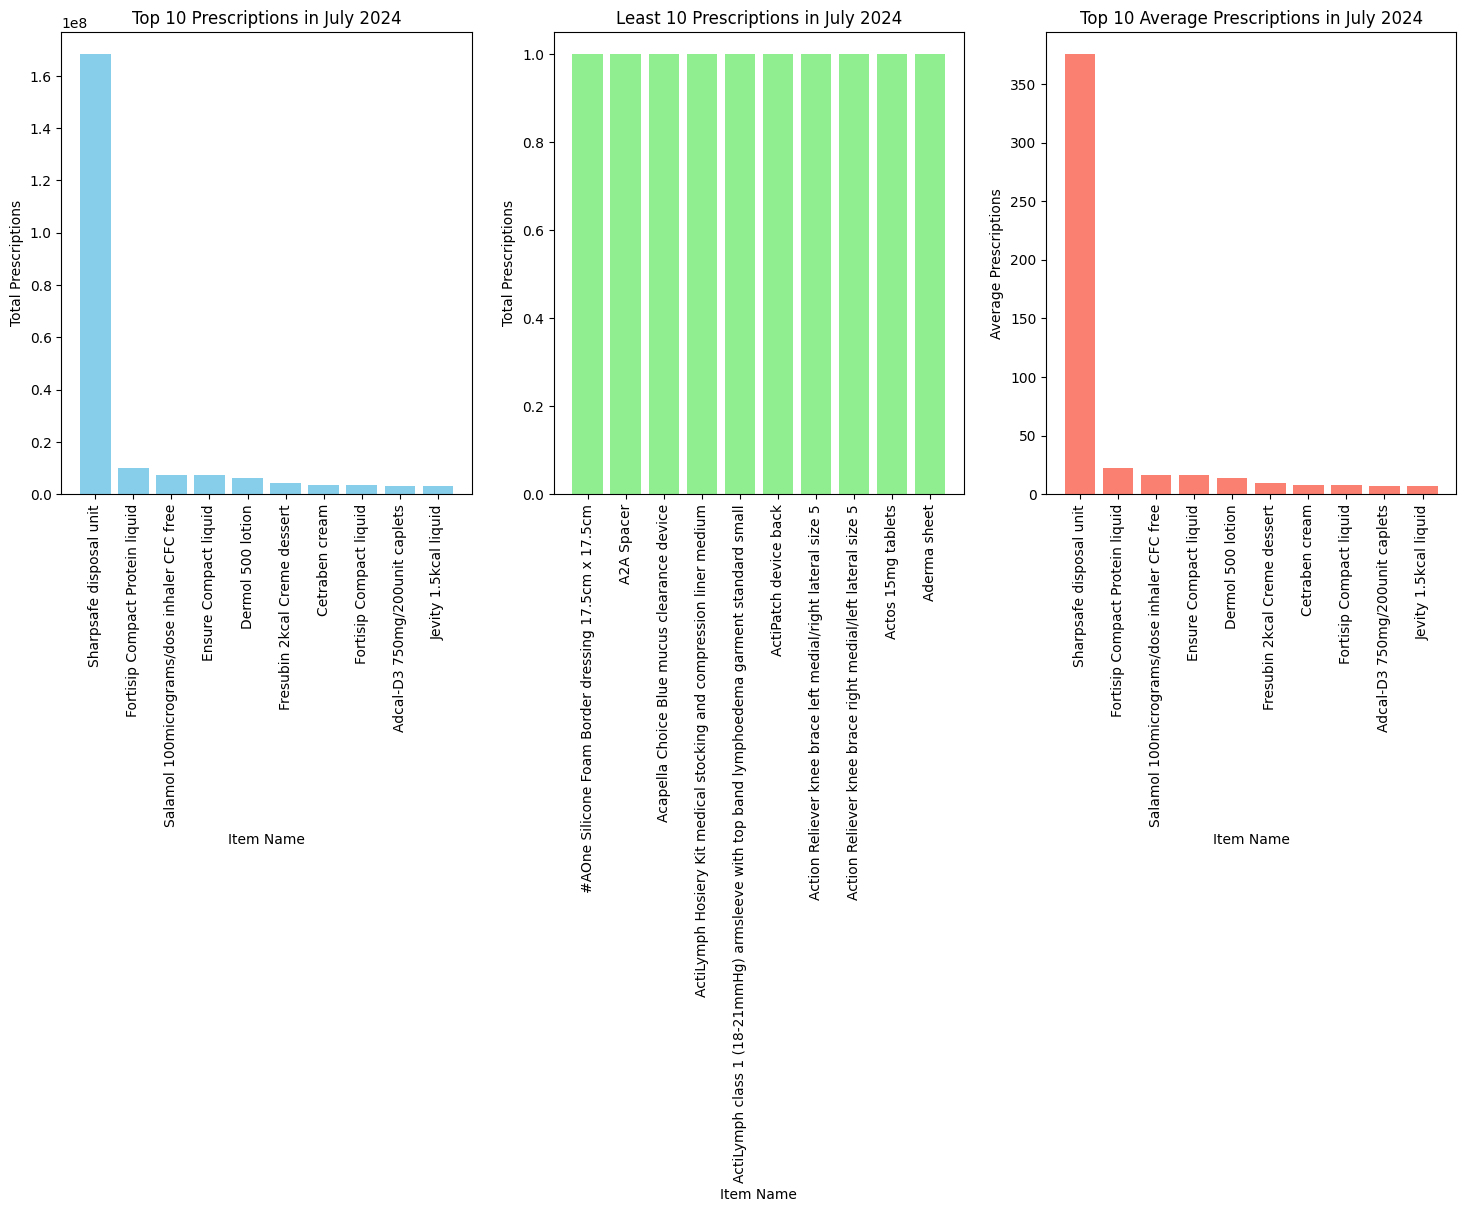

In [42]:
# Create a figure and axes for the subplots

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Bar chart for top 10 prescriptions
axes[0].bar(top_10_prescriptions['AMP_NM'], top_10_prescriptions['Total Quantity'], color='skyblue')
axes[0].set_title('Top 10 Prescriptions in July 2024')
axes[0].set_xlabel('Item Name')
axes[0].set_ylabel('Total Prescriptions')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Bar chart for least 10 prescriptions
axes[1].bar(least_10_prescriptions['AMP_NM'], least_10_prescriptions['Total Quantity'], color='lightgreen')
axes[1].set_title('Least 10 Prescriptions in July 2024')
axes[1].set_xlabel('Item Name')
axes[1].set_ylabel('Total Prescriptions')
axes[1].tick_params(axis='x', rotation=90)

# Bar chart for top 10 average prescriptions
axes[2].bar(average_10_prescriptions ['AMP_NM'], average_10_prescriptions['average'], color='salmon')
axes[2].set_title('Top 10 Average Prescriptions in July 2024')
axes[2].set_xlabel('Item Name')
axes[2].set_ylabel('Average Prescriptions')
axes[2].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


# Q2.ii Visualize the Gross Cost (£) trend for the top 15 GPs in July 2024 using a line plot.


In [43]:
# Filter for July 2024
july_data = gp_prescribe_df[(gp_prescribe_df['Month'] == 7) & (gp_prescribe_df['Year'] == 2024)]

In [44]:
# Group by Practice and calculate the total Gross Cost for each GP
gp_gross_cost = july_data.groupby('Practice')['Gross Cost (£)'].sum().reset_index()

In [45]:
# Select the top 15 GPs based on total Gross Cost
top_15_gps = gp_gross_cost.nlargest(15, 'Gross Cost (£)')['Practice']

In [46]:
# Filter the data to include only the top 15 GPs
top_15_data = july_data[july_data['Practice'].isin(top_15_gps)]

In [47]:
# Sort the data by Practice for better visualization
top_15_data = top_15_data.sort_values(by='Practice')

In [49]:
# Create a line plot with hover functionality using Plotly
fig = px.line(
    top_15_data,
    x='AMP_NM',
    y='Gross Cost (£)',
    color='Practice',  # Each GP will have a distinct line
    markers=True,  # to add markers to the lines
    title='Gross Cost (£) Trend for Top 15 GPs in July 2024',
    labels={'AMP_NM': 'Prescription Name', 'Gross Cost (£)': 'Gross Cost (£)'},
    hover_data={'Gross Cost (£)': ':.2f'}  # Format hover data to show 2 decimal places
)

# Update layout for better readability
fig.update_layout(
    xaxis_title='Prescription Name',
    yaxis_title='Gross Cost (£)',
    legend_title='GP (Practice)',
    hovermode='x unified'  # Show all hover information for the same x-axis point
)

# Show the plot
fig.show()

# Q2.iii Compare the summation of Actual Cost (£) for the top 15 GPs in July 2024 using a bar plot.

In [50]:

# by top 15 GP (Practice) within July 2024. Assign a distinct hue to each day to
# delineate daily variations. Incorporate hover details to display the exact sales numbers

# Filter for July 2024
july_data = gp_prescribe_df[(gp_prescribe_df['Month'] == 7) & (gp_prescribe_df['Year'] == 2024)]

# Group by Practice and calculate the total Actual Cost for each GP
gp_actual_cost = july_data.groupby('Practice')['Actual Cost (£)'].sum().reset_index()

# Select the top 15 GPs based on total Actual Cost
top_15_gps = gp_actual_cost.nlargest(15, 'Actual Cost (£)')['Practice']

# Filter the data to include only the top 15 GPs
top_15_data = july_data[july_data['Practice'].isin(top_15_gps)]

# Group by Practice and Day, then sum the Actual Cost
daily_actual_cost = top_15_data.groupby(['Practice', 'Day'])['Actual Cost (£)'].sum().reset_index()

# Create a bar plot with hover functionality using Plotly
fig = px.bar(
    daily_actual_cost,
    x='Practice',
    y='Actual Cost (£)',
    color='Day',  # Assign a distinct hue to each day
    opacity = 1.0,
    title='Total Actual Cost (£) for Top 15 GPs in July 2024',
    labels={'Practice': 'GP (Practice)', 'Actual Cost (£)': 'Actual Cost (£)'},
    hover_data={'Actual Cost (£)': ':.2f'},  # Format hover data to show 2 decimal places
    barmode="stack",
    color_discrete_sequence=px.colors.qualitative.Bold

)

# Update layout for better readability
fig.update_layout(
    xaxis_title='GP (Practice)',
    yaxis_title='Actual Cost (£)',
    legend_title='Day',
    hovermode='x unified'  # Show all hover information for the same x-axis point
)

# Show the plot
fig.show()


Q2.iv Create scatter plots for each of the randomly selected 20 GPs.

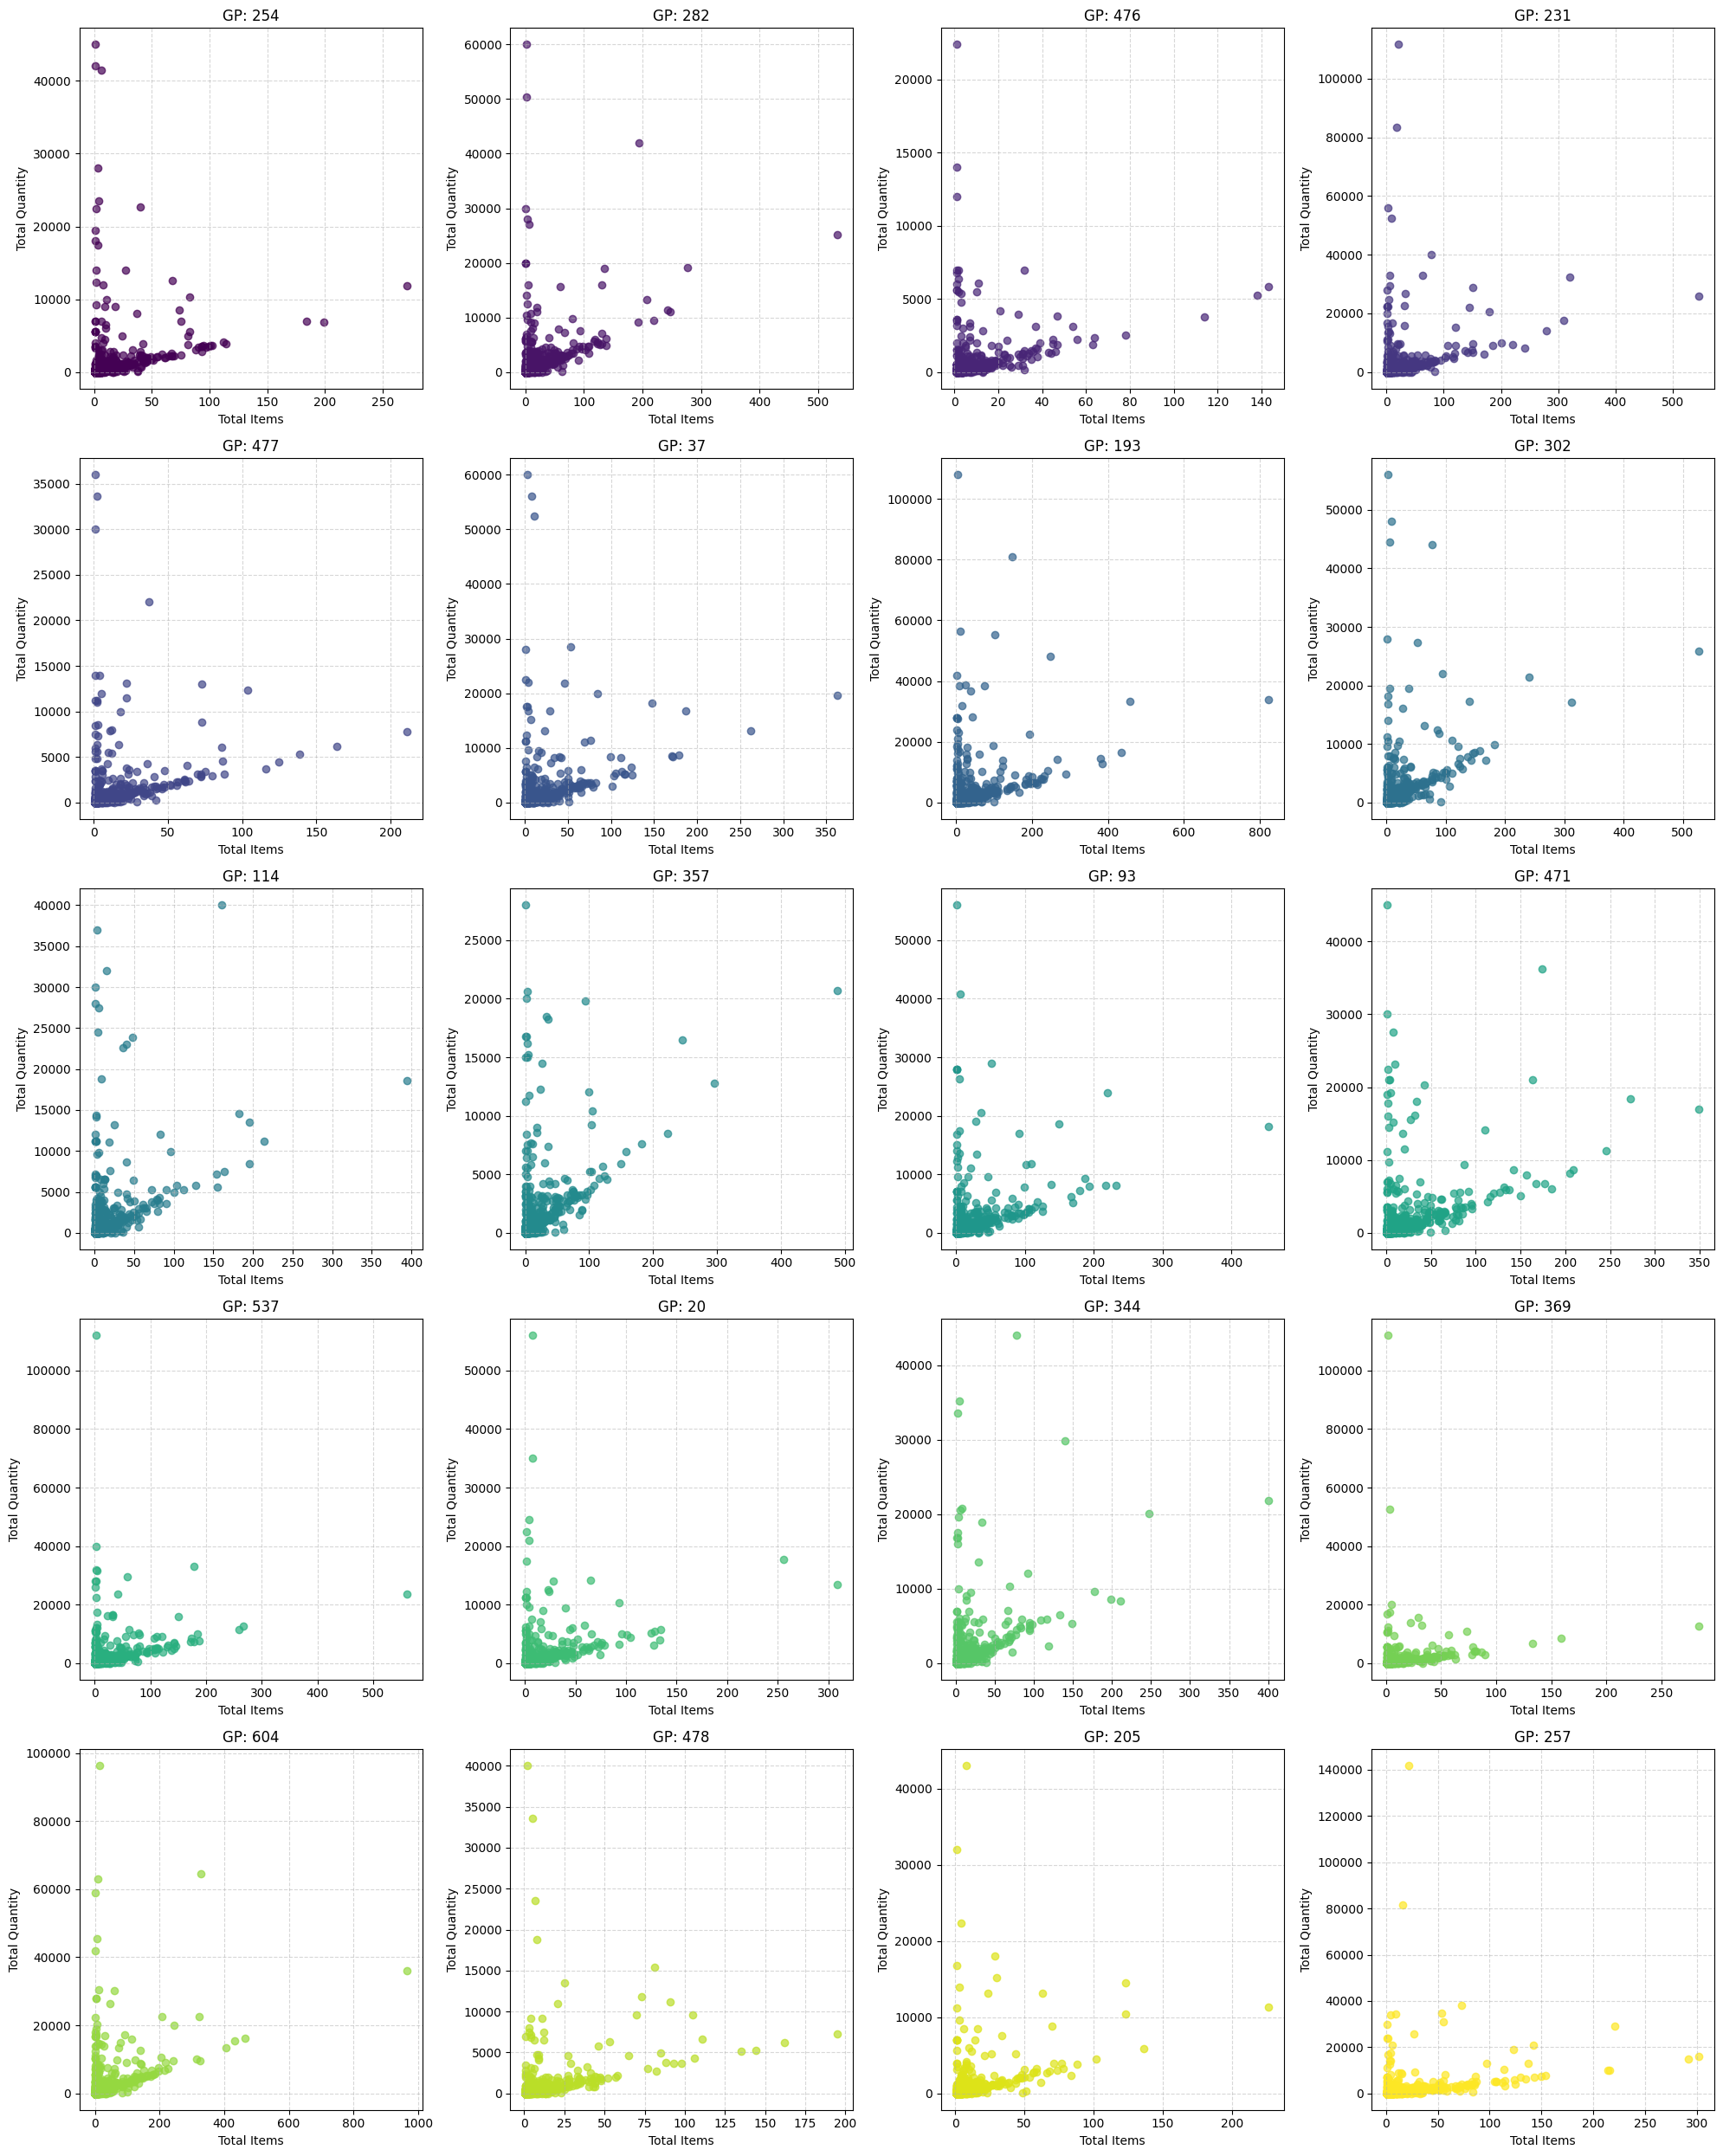

In [53]:
# Select 20 random GPs for the scatter plots
all_gps = july_data['Practice'].unique()  #all unique GP practices
selected_gps = rd.sample(list(all_gps), 20)  #Randomly select 20

# Define a list of colors for the scatter plots
colors = plt.cm.viridis(np.linspace(0, 1, 20))  # viridis colormap

rows = 5
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(20, 25))
axes = axes.flatten()

for i, gp in enumerate(selected_gps):
    gp_data = july_data[july_data['Practice'] == gp]
    axes[i].scatter(gp_data['Total Items'], gp_data['Total Quantity'], color=colors[i % len(colors)], alpha=0.7)
    axes[i].set_title(f'GP: {gp}', fontsize=12)
    axes[i].set_xlabel('Total Items', fontsize=10)
    axes[i].set_ylabel('Total Quantity', fontsize=10)
    axes[i].grid(True, linestyle='--', alpha=0.5)

for j in range(len(selected_gps), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()